In [1]:
import matplotlib.pyplot as plt
import numpy as np
from extract_center import CenterExtracter
from skimage.measure import EllipseModel
plt.rcdefaults()

In [2]:
image = "../../codes/34.jpg"
ref_image = "../../codes/ref_image.jpg"

## Raw Image

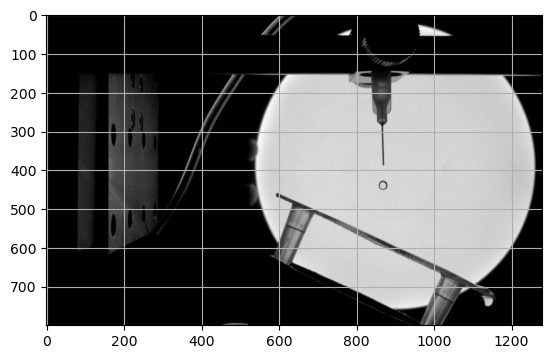

In [3]:
image_array = plt.imread(image)
ref_image_array = plt.imread(ref_image)
plt.imshow(image_array, cmap='gray')
plt.grid(True);

## Cropped Image

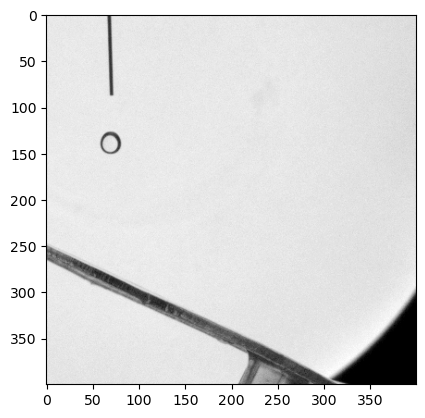

In [4]:
plt.imshow(image_array[300:700, 800:1200], cmap='gray');

## Subtracted Image

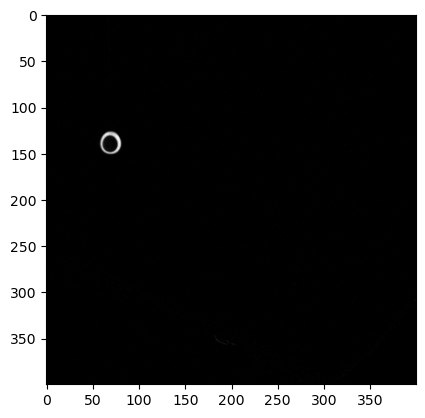

In [5]:
sub_image = np.maximum((ref_image_array / 255.0 - image_array / 255.0) * 255, 0)
plt.imshow(sub_image[300:700, 800:1200], cmap='gray')

## Thresholded Image

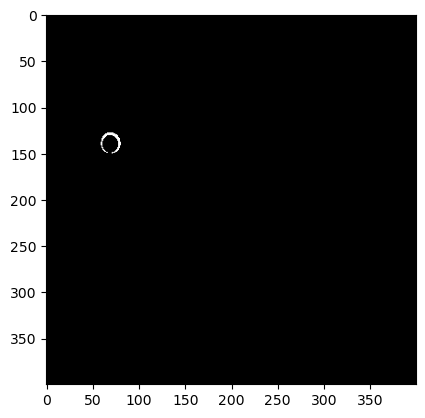

In [6]:
threholded_image = (sub_image > 110).astype(np.uint8)
plt.imshow(threholded_image[300:700, 800:1200], cmap='gray')

## Points

In [7]:
ce = CenterExtracter((800, 300, 1200, 700))

In [8]:
X, Y = ce._all_points_grayscale(sub_image[300:700, 800:1200])

## Ellipse

In [9]:
points = np.array([X, Y]).T
ell = EllipseModel()
ell.estimate(points)
xc, yc, a, b, theta = ell.params

In [12]:
xc

69.19891314329828

In [16]:
xc -  a * np.cos(t)

array([58.69607968, 58.71722528, 58.78057694, 58.88587956, 59.03270913,
       59.22047441, 59.44841935, 59.71562608, 60.02101866, 60.36336739,
       60.74129373, 61.15327593, 61.59765507, 62.07264179, 62.57632349,
       63.10667202, 63.66155186, 64.2387287 , 64.83587844, 65.45059659,
       66.08040789, 66.72277631, 67.37511525, 68.03479799, 68.69916821,
       69.36555072, 70.03126224, 70.69362219, 71.34996347, 71.99764323,
       72.63405349, 73.25663166, 73.86287082, 74.45032988, 75.01664333,
       75.55953083, 76.07680637, 76.56638707, 77.02630155, 77.45469789,
       77.84985111, 78.21017005, 78.53420384, 78.82064771, 79.06834825,
       79.27630806, 79.44368975, 79.56981935, 79.65418896, 79.69645888,
       79.69645888, 79.65418896, 79.56981935, 79.44368975, 79.27630806,
       79.06834825, 78.82064771, 78.53420384, 78.21017005, 77.84985111,
       77.45469789, 77.02630155, 76.56638707, 76.07680637, 75.55953083,
       75.01664333, 74.45032988, 73.86287082, 73.25663166, 72.63

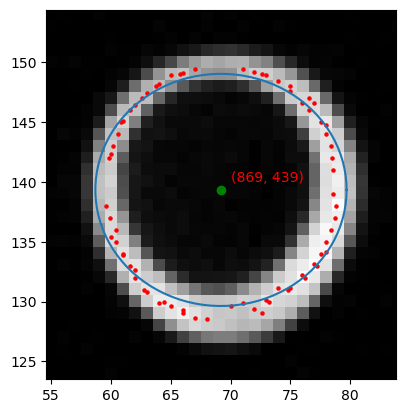

In [35]:
t = np.linspace(0, 2 * np.pi, 100)
plt.imshow(sub_image[300:700, 800:1200], cmap="gray")
plt.plot(xc + a * np.cos(t), yc + b * np.sin(t))
plt.scatter(xc,  yc, color="g")
plt.scatter(X, Y, s=5, c="r")
plt.xlim([np.min(X) - 5, np.max(X) + 5])
plt.ylim([np.min(Y) - 5, np.max(Y) + 5])
plt.annotate(
    f"{(int(xc)+ce.X, int(yc)+ce.Y)}",
    xy=( xc, yc),
    xytext=(int(xc)+1, int(yc)+1),
    color="r",
)
plt.show()

## Everything

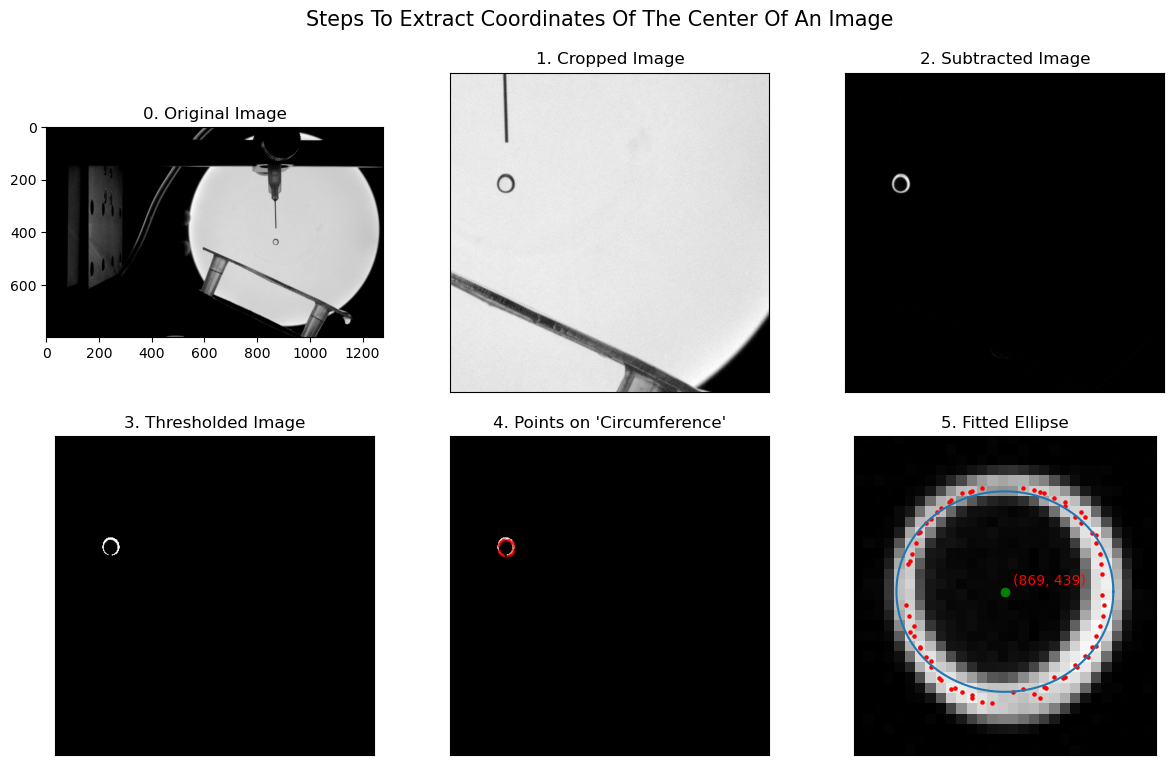

In [60]:
fig, axes = plt.subplots(2, 3)
fig.set_size_inches(12, 8)
fig.suptitle("Steps to extract coordinates of the center of an image\n".title(), fontsize=15)
fig.tight_layout()
for i in range(2):
    for j in range(3):
        if i==j==0:
            continue
        axes[i][j].set_xticks([])
        axes[i][j].set_yticks([])
ax = axes[0][0]
ax.imshow(image_array, cmap='gray')
ax.set_title('0. Original Image')
ax = axes[0][1]
ax.imshow(image_array[300:700, 800:1200], cmap='gray')
ax.set_title('1. Cropped Image')
ax = axes[0][2]
ax.imshow(sub_image[300:700, 800:1200], cmap='gray')
ax.set_title('2. Subtracted Image')
ax = axes[1][0]
ax.imshow(threholded_image[300:700, 800:1200], cmap='gray')
ax.set_title('3. Thresholded Image')
ax = axes[1][1]
ax.imshow(threholded_image[300:700, 800:1200], cmap='gray')
ax.scatter(X, Y, s=1, c="red", alpha=0.3)
ax.set_title("4. Points on 'Circumference'")
ax = axes[1][2]
t = np.linspace(0, 2 * np.pi, 100)
ax.imshow(sub_image[300:700, 800:1200], cmap="gray")
ax.plot(xc + a * np.cos(t), yc + b * np.sin(t))
ax.scatter(xc,  yc, color="g")
ax.scatter(X, Y, s=5, c="r")
ax.set_xlim([np.min(X) - 5, np.max(X) + 5])
ax.set_ylim([np.min(Y) - 5, np.max(Y) + 5])
ax.annotate(
    f"{(int(xc)+ce.X, int(yc)+ce.Y)}",
    xy=( xc, yc),
    xytext=(int(xc)+1, int(yc)+1),
    color="r",
)
ax.set_title('5. Fitted Ellipse')
fig.savefig("paper/final.png", dpi=300)